<h3>Load and preprocess data</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from src.recsys_utils import anaylze_item
from string import punctuation

In [2]:
book_df = pd.read_csv('data/books_data.csv')
book_df

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0


In [3]:
book_df = book_df.drop(columns = ['image', 'previewLink', 'ratingsCount', 'infoLink', 'publisher', 'publishedDate'])

In [4]:
book_df = book_df.dropna()
book_df.shape

(136138, 4)

In [5]:
book_df

,Title,description,authors,categories
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],['Religion']
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],['Fiction']
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],['Religion']
8,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],['Biography & Autobiography']
...,...,...,...,...
212394,Final things,Grace's father believes in science and builds ...,['Jenny Offill'],['Fiction']
212397,The Magic of the Soul: Applying Spiritual Powe...,"""The Magic of the Soul, Applying Spiritual Pow...",['Patrick J. Harbula'],"['Body, Mind & Spirit']"
212398,Autodesk Inventor 10 Essentials Plus,Autodesk Inventor 2017 Essentials Plus provide...,"['Daniel Banach', 'Travis Jones']",['Computers']
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],['Juvenile Fiction']


In [6]:
book_df['authors'] = book_df['authors'].apply(lambda x: ''.join([char for char in x if char not in punctuation]))
book_df['categories'] = book_df['categories'].apply(lambda x: ''.join([char for char in x if char not in punctuation]))
book_df['combined_text'] = book_df["Title"] + " " + book_df['description'] + " " + book_df['authors'] + " " + book_df['categories']
book_df

,Title,description,authors,categories,combined_text
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,Biography Autobiography,Dr. Seuss: American Icon Philip Nel takes a fa...
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,David R Ray,Religion,Wonderful Worship in Smaller Churches This res...
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,Veronica Haddon,Fiction,Whispers of the Wicked Saints Julia Thomas fin...
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,Everett Ferguson,Religion,The Church of Christ: A Biblical Ecclesiology ...
8,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,Mary Fabyan Windeatt,Biography Autobiography,Saint Hyacinth of Poland The story for childre...
...,...,...,...,...,...
212394,Final things,Grace's father believes in science and builds ...,Jenny Offill,Fiction,Final things Grace's father believes in scienc...
212397,The Magic of the Soul: Applying Spiritual Powe...,"""The Magic of the Soul, Applying Spiritual Pow...",Patrick J Harbula,Body Mind Spirit,The Magic of the Soul: Applying Spiritual Powe...
212398,Autodesk Inventor 10 Essentials Plus,Autodesk Inventor 2017 Essentials Plus provide...,Daniel Banach Travis Jones,Computers,Autodesk Inventor 10 Essentials Plus Autodesk ...
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",Elvira Woodruff,Juvenile Fiction,The Orphan Of Ellis Island (Time Travel Advent...


In [7]:
book_df['vector_text'] = book_df['combined_text'].apply(anaylze_item)

In [8]:
book_df

,Title,description,authors,categories,combined_text,vector_text
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,Biography Autobiography,Dr. Seuss: American Icon Philip Nel takes a fa...,"[[0.10153461651336192, 0.10153461651336192, 0...."
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,David R Ray,Religion,Wonderful Worship in Smaller Churches This res...,"[[0.1796053020267749, 0.1796053020267749, 0.17..."
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,Veronica Haddon,Fiction,Whispers of the Wicked Saints Julia Thomas fin...,"[[0.07808688094430304, 0.07808688094430304, 0...."
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,Everett Ferguson,Religion,The Church of Christ: A Biblical Ecclesiology ...,"[[0.3713906763541037, 0.09284766908852593, 0.0..."
8,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,Mary Fabyan Windeatt,Biography Autobiography,Saint Hyacinth of Poland The story for childre...,"[[0.12216944435630522, 0.12216944435630522, 0...."
...,...,...,...,...,...,...
212394,Final things,Grace's father believes in science and builds ...,Jenny Offill,Fiction,Final things Grace's father believes in scienc...,"[[0.09325048082403138, 0.09325048082403138, 0...."
212397,The Magic of the Soul: Applying Spiritual Powe...,"""The Magic of the Soul, Applying Spiritual Pow...",Patrick J Harbula,Body Mind Spirit,The Magic of the Soul: Applying Spiritual Powe...,"[[0.07352146220938077, 0.07352146220938077, 0...."
212398,Autodesk Inventor 10 Essentials Plus,Autodesk Inventor 2017 Essentials Plus provide...,Daniel Banach Travis Jones,Computers,Autodesk Inventor 10 Essentials Plus Autodesk ...,"[[0.06008417681261097, 0.1802525304378329, 0.1..."
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",Elvira Woodruff,Juvenile Fiction,The Orphan Of Ellis Island (Time Travel Advent...,"[[0.1690308509457033, 0.1690308509457033, 0.16..."


In [11]:
ratings_df = pd.read_csv('data/Books_rating.csv') 

In [14]:
ratings_df.columns

Index(['Id', 'Title', 'User_id', 'profileName', 'review/score', 'review/text'], dtype='object')

In [12]:
ratings_df = ratings_df.drop(columns = ['Price', 'review/summary', 'review/time', 'review/helpfulness'])

<Axes: xlabel='review/score', ylabel='count'>

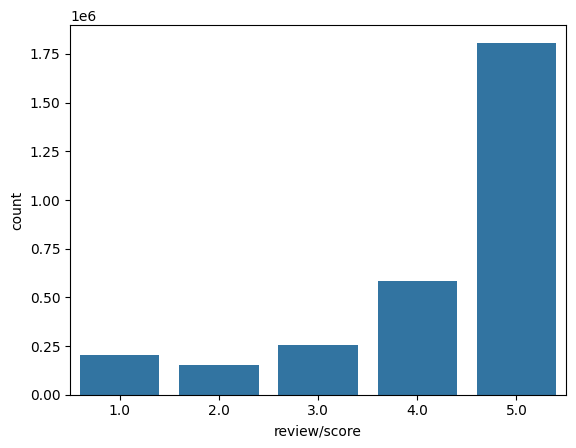

In [13]:
sns.countplot(data = ratings_df, x = 'review/score')

In [15]:
ratings_df = ratings_df.dropna()
ratings_df.shape

(2437899, 6)

In [16]:
ratings_df

,Id,Title,User_id,profileName,review/score,review/text
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,5.0,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,5.0,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...
2999990,B000NSLVCU,The Idea of History,AI1QNMVF2E3TN,"Robin George ""Master of Arts""",5.0,Highly Recommended.This book is one of the bes...
2999994,B000NSLVCU,The Idea of History,AOFGOUMXLMVZS,"S. Grotzke ""scquest""",4.0,History is not a scientific process of cutting...
2999996,B000NSLVCU,The Idea of History,A1SMUB9ASL5L9Y,jafrank,4.0,This is pretty interesting. Collingwood seems ...
2999997,B000NSLVCU,The Idea of History,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",4.0,"This is a good book but very esoteric. ""What i..."


In [ ]:
ratings_df['review/text'][1]

"I don't care much for Dr. Seuss but after reading Philip Nel's book I changed my mind--that's a good testimonial to the power of Rel's writing and thinking. Rel plays Dr. Seuss the ultimate compliment of treating him as a serious poet as well as one of the 20th century's most interesting visual artists, and after reading his book I decided that a trip to the Mandeville Collections of the library at University of California in San Diego was in order, so I could visit some of the incredible Seuss/Geisel holdings they have there.There's almost too much to take in, for, like William Butler Yeats, Seuss led a career that constantly shifted and metamoprhized itself to meet new historical and political cirsumstances, so he seems to have been both a leftist and a conservative at different junctures of his career, both in politics and in art. As Nel shows us, he was once a cartoonist for the fabled PM magazine and, like Andy Warhol, he served his time slaving in the ad business too. All was in